In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\82511\\Desktop\\future\\project\\archive\\mushrooms.csv")

In [3]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
data.shape

(8124, 23)

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
print(data["class"].unique())
print(data["class"].value_counts())

['p' 'e']
e    4208
p    3916
Name: class, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for i in data.columns:
    data[i] = labelencoder.fit_transform(data[i])

data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [26]:
X = data.iloc[:,1:23]
y = data.iloc[:,0]

[[ 0.22820662 -0.34547209]
 [-1.93656097  4.79691211]
 [-1.65417317  2.46436226]
 ...
 [-1.86050705  0.47024368]
 [ 7.29306843 -1.25169255]
 [-4.83553281 -3.58375805]]


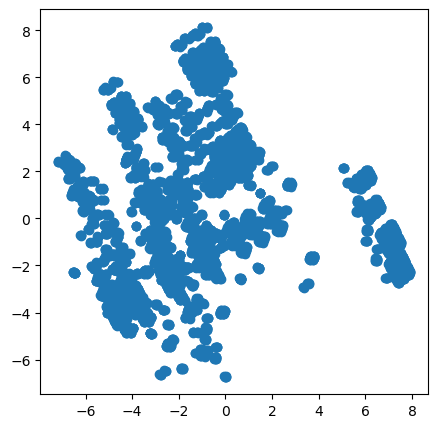

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(X)
print(x)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()


In [28]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2, random_state=4).fit(x)
print(cluster)
centroid = cluster.cluster_centers_
print(centroid)
y_pred = cluster.labels_
y_pred

KMeans(n_clusters=2, random_state=4)
[[-2.09438354  0.18866595]
 [ 6.54694296 -0.58976076]]


array([0, 0, 0, ..., 0, 1, 0])

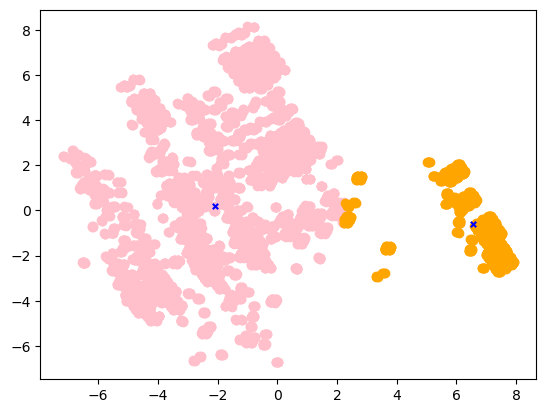

In [29]:
color = ['pink','orange']
fig,ax1 = plt.subplots(1)
for i in range(2):
    ax1.scatter(x[y_pred==i,0],x[y_pred==i,1],
                marker="o",
                c=color[i])

ax1.scatter(centroid[:,0],centroid[:,1],
           marker="x",
           s=15,
           c='blue')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

1.0
[[856   0]
 [  0 769]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       1.00      1.00      1.00       769

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0


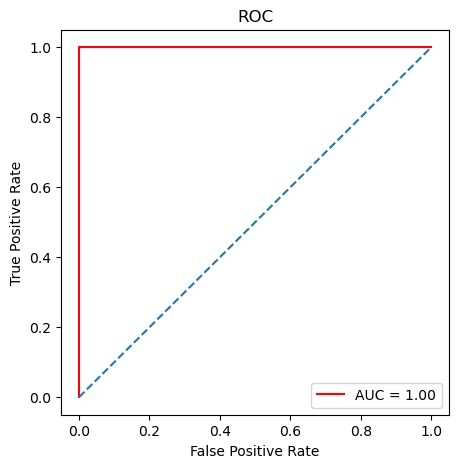

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
score = rfc.score(X_test,y_pred)
print(score)


from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))


from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc  

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC')

plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

